In [1]:
import numpy as np

# 切片

In [2]:
# 轴的个数=维度;轴3个，轴0=2；轴1=2，轴2=4
a=np.random.randn(2,2,3)
a

array([[[ 0.3699368 , -0.60261219, -0.83183843],
        [ 1.0441109 , -1.40780363,  1.16307588]],

       [[-0.24587673,  0.10628976,  0.3960766 ],
        [ 1.17536026,  0.33211868, -0.13789499]]])

In [3]:
# 轴之间的切片，以逗号分隔；从m->n,以冒号分隔
# 提取轴0=0，轴1=1，轴2=1，2
a[0,1,1:3]

array([-1.40780363,  1.16307588])

# bool 切片

In [4]:
a=np.random.randn(2,3)
a

array([[-0.12002676, -0.24844197,  0.16716983],
       [ 0.07998652, -2.33909345,  1.18479931]])

In [5]:
# bool 切片，长度必须同轴一样
a[[True,False],[True,True,False]]

array([-0.12002676, -0.24844197])

In [6]:
# 提取第1行第2，3列
a[[0],[1,2]]

array([-0.24844197,  0.16716983])

In [7]:
a[[0]]==a[0]

array([[ True,  True,  True]])

In [8]:
# 赋值，则凡是为True的行=3；同过滤不一样
a[[True,False]]=3
a

array([[ 3.        ,  3.        ,  3.        ],
       [ 0.07998652, -2.33909345,  1.18479931]])

In [9]:
# 过滤，则只有True 所在的行
a[[True,False]]

array([[3., 3., 3.]])

# 花式索引

In [18]:
a=np.empty((8,4))
for i in range(8):
    a[i]=i
a

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [19]:
# 按照轴0，提取第 3、1、2行
a[[2,0,1]]

array([[2., 2., 2., 2.],
       [0., 0., 0., 0.],
       [1., 1., 1., 1.]])

In [20]:
# 倒序提取，从-1开始;倒数第3，1，2行
a[[-3,-1,-2]]

array([[5., 5., 5., 5.],
       [7., 7., 7., 7.],
       [6., 6., 6., 6.]])

In [23]:
# (3,0)=第4行第1列,(2,2) =第3行第3列
a[[3,2],[0,2]]

array([3., 2.])

In [25]:
# 提取第4、3行； 然后在截取第1、3列
a[[3,2]][:,[0,2]]

array([[3., 3.],
       [2., 2.]])

In [27]:
# 返回索引，轴0 cross 轴1=(1,0),(1,3),(1,1),(1,2)
# (5,0),(5,3)....
np.ix_([1,5,7,2],[0,3,1,2])

(array([[1],
        [5],
        [7],
        [2]]),
 array([[0, 3, 1, 2]]))

In [30]:
a[np.ix_([1,5,7,2],[0,3,1,2])]==a[[1,5,7,2]][:,[0,3,1,2]]

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

# 转置

In [32]:
a=np.arange(16).reshape((2,2,4))
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [33]:
a.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [34]:
# 高维转置--TODO 未理解
a.transpose((2,1,0))

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

In [37]:
# 同 a.transpose((2,1,0)) 一样，轴对换
# 由2*2*4--> 4*2*2
a.swapaxes(0,2)

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

# ufunc:通用数学函数

In [40]:
a=np.random.randn(7)*5
a

array([ 1.70304852, -2.88305676,  3.39977963, -1.77729333, -1.1681576 ,
        2.84014631, -1.65938417])

In [41]:
# 拆分为浮点数+整数
np.modf(a)

(array([ 0.70304852, -0.88305676,  0.39977963, -0.77729333, -0.1681576 ,
         0.84014631, -0.65938417]),
 array([ 1., -2.,  3., -1., -1.,  2., -1.]))

In [42]:
# 各元素四舍五入最近的整数
np.rint(a)

array([ 2., -3.,  3., -2., -1.,  3., -2.])

# 矢量化

# 数组元素级别的计算，代替循环

In [55]:
points=np.arange(-5,5,1)
xs,ys=np.meshgrid(points,points)

In [56]:
#重复len(points)个行，每一行都同points 一样
xs

array([[-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4]])

In [57]:
# 对points 中的每个数字，进行重复
ys

array([[-5, -5, -5, -5, -5, -5, -5, -5, -5, -5],
       [-4, -4, -4, -4, -4, -4, -4, -4, -4, -4],
       [-3, -3, -3, -3, -3, -3, -3, -3, -3, -3],
       [-2, -2, -2, -2, -2, -2, -2, -2, -2, -2],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4]])

In [58]:
# [1,2,3] 重复len([4,5])次；[4,5]每个元素重复len([1,2,3])
np.meshgrid([1,2,3],[4,5])

[array([[1, 2, 3],
        [1, 2, 3]]),
 array([[4, 4, 4],
        [5, 5, 5]])]

In [61]:
# 对xs的每个元素平方+ys的平方->开方
z=np.sqrt(xs ** 2 + ys ** 2)

In [62]:
import matplotlib.pyplot as plt

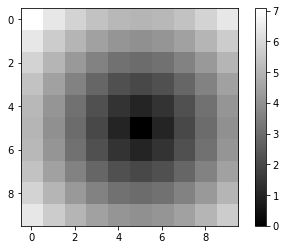

In [63]:
plt.imshow(z,cmap=plt.cm.gray)
plt.colorbar()